# Double ZeroPi

In [1]:
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

<img src="pics/doubleZeroPi.png" width="220" />

In [4]:
loop1 = sq.Loop()
loop2 = sq.Loop()

CJ = sq.Capacitor(0.15, "GHz")
JJ1 = sq.Junction(5, "GHz", loops=[loop1], cap = CJ)
JJ2 = sq.Junction(5, "GHz", loops=[loop2], cap = CJ)
L = sq.Inductor(0.13, "GHz", loops=[loop1,loop2])

circuitElements = {(0, 1): [JJ1],
                   (1, 2): [JJ1],
                   (0, 3): [JJ2],
                   (2, 3): [JJ2],
                   (0, 2): [L]}

cr1 = sq.Circuit(circuitElements)

## Eigenfrequencies 

In [5]:
cr1.setTruncationNumbers([39,11,11])
numEig=8
phiExt = np.linspace(0,1,40)*2*np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    loop2.setFlux(phiExt[i])
    eigenValues[:, i], _ = cr1.run(numEig)

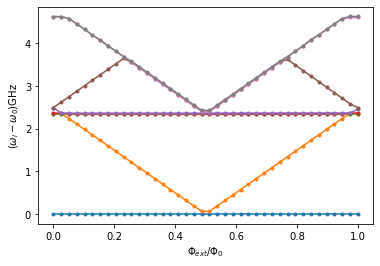

In [6]:
for i in range(numEig):
    plt.plot(phiExt/2/np.pi, eigenValues[i,:]- eigenValues[0,:],'.-')

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

## 1 arm len 4

In [2]:
loop1 = sq.Loop()

CJ = sq.Capacitor(0.15, "GHz")
JJ1 = sq.Junction(5, "GHz", loops=[loop1], cap = CJ)
L = sq.Inductor(0.13, "GHz", loops=[loop1])

circuitElements = {(0, 1): [JJ1],
                   (1, 2): [JJ1],
                   (2, 3): [JJ1],
                   (3, 4): [JJ1],
                   (0, 4): [L]}

cr1 = sq.Circuit(circuitElements)

In [3]:
cr1.omega

array([4.96332e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00])

In [4]:
cr1.wTrans

array([[-1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  1., -1., -1.]])

## 2 arm len 3

In [5]:
loop1 = sq.Loop()
loop2 = sq.Loop()

CJ = sq.Capacitor(0.15, "GHz")
JJ1 = sq.Junction(5, "GHz", loops=[loop1], cap = CJ)
JJ2 = sq.Junction(5, "GHz", loops=[loop2], cap = CJ)
L = sq.Inductor(0.13, "GHz", loops=[loop1,loop2])

circuitElements = {(0, 1): [JJ1],
                   (1, 2): [JJ1],
                   (2, 3): [JJ1],
                   (3, 5): [JJ2],
                   (5, 4): [JJ2],
                   (4, 0): [JJ2],
                   (0, 3): [L]}

cr1 = sq.Circuit(circuitElements)

In [6]:
cr1.omega

array([3.03940065e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [7]:
cr1.wTrans

array([[-1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  1., -1.,  0.,  0.],
       [-1.,  0.,  0.,  1.,  0.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0., -1., -1.]])